#  Micro Credit Loan Model

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


## Pre-processing

In [3]:
#checking the shape of dataset
df.shape

(209593, 37)

In [4]:
#checking the datatypes of each columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [5]:
df.msisdn.nunique()

186243

In [6]:
#checking the columns names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:
#checking any null present in dataset
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
#printing each column
for column in df:
    print(df[column])

0              1
1              2
2              3
3              4
4              5
           ...  
209588    209589
209589    209590
209590    209591
209591    209592
209592    209593
Name: Unnamed: 0, Length: 209593, dtype: int64
0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64
0         21408I70789
1         76462I70374
2         17943I70372
3         55773I70781
4         03813I82730
             ...     
209588    22758I85348
209589    95583I84455
209590    28556I85350
209591    59712I82733
209592    65061I85339
Name: msisdn, Length: 209593, dtype: object
0          272.0
1          712.0
2          535.0
3          241.0
4          947.0
           ...  
209588     404.0
209589    1075.0
209590    1013.0
209591    1732.0
209592    1581.0
Name: aon, Length: 209593, dtype: float64
0          3055.050000
1         12122.000000
2          1398.000000
3       

## check  the duplicate

In [9]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate


In [10]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [11]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [12]:
df.iloc[:,11:-12].describe()

,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712
std,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386
min,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000
max,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000


In [13]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

### Dropping the datapoints which arew not relastic

In [14]:
df[df['last_rech_date_ma'] > 120]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
30,31,1,70130I90843,-42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,...,6.0,1.0,1.0,6,6,1.0,0.000000,0.00,UPW,2016-06-07
53,54,1,09561I70374,635.0,5.500000,5.500000,75.90,75.90,559958.753409,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.00,UPW,2016-06-05
159,160,1,84667I85348,415.0,9507.542667,9622.480000,418.58,-239.39,835708.591971,0.0,...,12.0,0.0,4.0,30,12,0.0,4.666667,9.75,UPW,2016-07-19
233,234,1,29143I95202,211.0,0.640000,0.640000,227.60,227.60,942339.085159,0.0,...,6.0,1.0,1.0,6,6,1.0,0.000000,0.00,UPW,2016-06-05
477,478,1,22322I84454,675.0,36.495000,36.495000,354.75,354.75,851900.279638,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.00,UPW,2016-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209057,209058,1,89443I82736,1096.0,76.076000,76.076000,238.55,238.55,906797.496602,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.00,UPW,2016-06-13
209374,209375,1,39810I82730,1319.0,56.602333,56.602333,921.69,921.69,717893.571826,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.00,UPW,2016-06-11
209466,209467,1,59525I88698,190.0,2601.750000,2622.100000,-334.62,-441.57,767980.563105,0.0,...,12.0,0.0,3.0,24,12,0.0,6.000000,6.00,UPW,2016-07-05
209501,209502,1,54642I70787,460.0,55.520000,55.520000,877.40,877.40,611678.500427,0.0,...,6.0,0.0,2.0,12,6,0.0,13.000000,13.00,UPW,2016-06-10


In [15]:
df.drop(df[(df['last_rech_date_ma'] > 120)].index, inplace=True)

df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [16]:
df.reset_index()

,index,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208541,209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
208542,209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
208543,209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
208544,209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [17]:
df.shape

(208546, 37)

In [18]:
df[df['last_rech_date_da'] > 120]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
195,196,1,56454I85340,560.0,13.572000,13.572000,365.30,365.30,3.0,995586.030185,...,6.0,0.5,2.0,12,6,0.5,0.000,0.000000,UPW,2016-06-26
665,666,1,27748I84458,775.0,37.473333,37.473333,496.98,496.98,3.0,906659.029075,...,6.0,0.0,3.0,18,6,0.0,8.000,8.000000,UPW,2016-06-22
704,705,1,82884I85330,847.0,31.666667,31.666667,626.81,626.81,5.0,779774.580500,...,6.0,0.0,5.0,30,6,0.0,4.200,4.200000,UPW,2016-06-19
1104,1105,1,64278I90840,305.0,40.166667,40.166667,505.30,505.30,5.0,995848.999708,...,6.0,0.0,1.0,6,6,0.0,0.000,0.000000,UPW,2016-06-10
1379,1380,1,37801I70786,474.0,28.569333,28.569333,458.50,458.50,10.0,658718.768973,...,6.0,0.5,2.0,12,6,0.5,0.000,0.000000,UPW,2016-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208916,208917,0,89494I70378,224.0,1521.920000,1527.200000,1646.97,2471.97,3.0,693333.241041,...,6.0,0.0,2.0,12,6,0.0,0.000,27.000000,UPW,2016-07-22
209008,209009,1,52968I89238,1683.0,40586.576000,40808.160000,4330.10,4734.68,6.0,859210.205730,...,12.0,0.0,13.0,90,12,0.0,1.875,2.615385,UPW,2016-07-22
209176,209177,0,01904I88659,116.0,113.652000,113.652000,2062.20,2062.20,8.0,809043.116984,...,6.0,0.0,1.0,6,6,0.0,0.000,0.000000,UPW,2016-06-28
209231,209232,0,20247I82735,1140.0,733.433333,759.000000,-89.93,-158.70,23.0,799233.445316,...,6.0,0.0,2.0,12,6,0.0,0.000,0.000000,UPW,2016-07-13


In [19]:
df.drop(df[(df['last_rech_date_da'] > 120)].index, inplace=True)

df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [20]:
df.reset_index()

,index,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207500,209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
207501,209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
207502,209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
207503,209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [21]:
df.shape

(207505, 37)

In [22]:
df[df['fr_ma_rech30'] > 30]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
129,130,1,43431I90847,347.0,47.466667,47.466667,186.80,186.80,-13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-20
248,249,1,84260I88688,181.0,4962.000000,5010.970000,399.25,1239.25,6.0,0.0,...,6.0,0.0,4.0,24,6,0.0,0.000000,6.500000,UPW,2016-07-30
501,502,1,03276I70375,336.0,19.733333,19.733333,94.40,94.40,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,10.500000,10.500000,UPW,2016-06-16
521,522,1,89213I70781,246.0,10.740333,10.740333,205.45,205.45,-26.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-07
896,897,1,17324I84450,1471.0,5474.000000,5474.000000,4757.29,6056.53,8.0,0.0,...,6.0,0.0,2.0,12,6,0.0,56.500000,56.500000,UPW,2016-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208847,208848,1,84878I88650,954.0,5148.000000,6283.600000,821.44,1543.54,2.0,0.0,...,0.0,0.0,1.0,6,6,1.0,0.000000,18.500000,UPW,2016-08-09
208857,208858,1,37375I82736,345.0,26.600000,26.600000,105.00,105.00,1.0,0.0,...,6.0,0.0,3.0,18,6,0.0,6.666667,6.666667,UPW,2016-06-21
209218,209219,1,27817I82733,1341.0,19.128667,19.128667,70.00,70.00,-26.0,0.0,...,6.0,0.0,2.0,12,6,0.0,6.000000,6.000000,UPW,2016-06-07
209264,209265,1,14013I70377,563.0,13.882667,13.882667,256.44,256.44,-29.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-04


In [23]:
df.drop(df[(df['fr_ma_rech30'] > 30)].index, inplace=True)

df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [24]:
df.reset_index()

,index,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206111,209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
206112,209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
206113,209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
206114,209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [25]:
df.shape

(206116, 37)

In [26]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [27]:
df[df['cnt_da_rech30'] > 30]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
112,113,1,18809I88648,131.0,948.816667,950.500000,1969.49,2015.51,1.0,0.0,...,6.0,0.0,2.00000,12,6,0.0,0.000000,1.000000,UPW,2016-07-01
121,122,1,21241I88689,1162.0,56.666667,56.666667,398.14,398.14,1.0,0.0,...,6.0,0.0,2340.28012,36,6,0.0,5.500000,5.500000,UPW,2016-06-17
1490,1491,0,97258I90584,1236.0,4115.220667,4130.330000,1710.40,3093.92,5.0,0.0,...,6.0,0.0,2.00000,12,6,0.0,0.000000,0.000000,UPW,2016-07-16
1536,1537,1,69453I90583,188.0,94.400000,94.400000,3542.50,3542.50,4.0,0.0,...,6.0,0.0,4.00000,24,6,0.0,6.000000,6.000000,UPW,2016-06-25
2114,2115,1,58273I90840,754.0,8653.260000,8682.600000,887.64,3480.72,1.0,0.0,...,6.0,0.0,4.00000,24,6,0.0,5.500000,5.666667,UPW,2016-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208314,208315,1,46121I90843,923.0,7017.000000,11066.410000,4888.73,5420.59,1.0,0.0,...,12.0,0.5,2.00000,18,12,0.5,4.500000,4.500000,UPW,2016-08-16
208413,208414,1,56606I95204,111.0,5425.000000,6598.730000,400.26,840.39,12.0,112.0,...,6.0,0.0,1.00000,6,6,0.0,0.000000,0.000000,UPW,2016-08-14
208450,208451,1,12409I85339,1436.0,8301.000000,10539.690000,3687.89,7512.47,6.0,0.0,...,6.0,0.0,5.00000,30,6,0.0,0.000000,8.000000,UPW,2016-08-11
208695,208696,1,43577I70372,497.0,7864.000000,8945.760000,2102.87,2282.87,8.0,0.0,...,6.0,0.0,2.00000,12,6,0.0,7.000000,7.000000,UPW,2016-08-07


In [28]:
df.drop(df[(df['cnt_da_rech30'] > 30)].index, inplace=True)

df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [29]:
df.reset_index()

,index,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205072,209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
205073,209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
205074,209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
205075,209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [30]:
df.shape

(205077, 37)

In [31]:
df[df['fr_da_rech30'] > 30]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
114,115,1,48229I88690,1443.000000,30376.000,37204.420,7199.75,11131.96,2.0,0.0,...,6.0,0.0,13.0,78,6,0.0,2.375000,2.714286,UPW,2016-08-09
594,595,1,42864I84457,1280.000000,7603.000,14518.870,701.73,2614.85,5.0,55.0,...,6.0,0.0,9.0,54,6,0.0,4.500000,7.555556,UPW,2016-08-11
1769,1770,1,91582I90841,742.000000,6200.000,8424.070,598.37,1217.26,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,0.000000,10.500000,UPW,2016-08-11
1831,1832,1,08204I90844,433.000000,12.628,12.628,108.71,108.71,9.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-07
1884,1885,1,56008I90580,944133.631536,870.000,870.000,3913.05,3913.05,74.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.000000,0.000000,UPW,2016-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208107,208108,1,99470I82732,710.000000,9183.000,14859.300,299.96,820.72,38.0,0.0,...,6.0,0.0,3.0,18,6,0.0,0.000000,6.000000,UPW,2016-08-07
208466,208467,1,16397I84450,1884.000000,45539.000,46545.410,9194.04,11846.07,3.0,0.0,...,6.0,0.0,16.0,96,6,0.0,1.500000,1.764706,UPW,2016-07-31
208915,208916,1,78228I88650,705.000000,-3.861,-3.861,2488.59,2488.59,-6.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-27
209412,209413,1,79402I89237,83.000000,15.550,15.550,948.30,948.30,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-15


In [32]:
df.drop(df[(df['fr_da_rech30'] > 30)].index, inplace=True)

df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [33]:
df.reset_index()

,index,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204044,209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
204045,209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
204046,209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
204047,209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [34]:
df.shape

(204049, 37)

In [35]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [36]:
df[df['maxamnt_loans30'] > 20]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
118,119,1,23241I82735,1454.0,19.578667,19.578667,148.88,148.88,1.0,0.0,...,61907.697372,0.0,5.0,30,6,0.0,3.500000,3.500000,UPW,2016-06-08
125,126,1,70901I82730,811.0,166.796667,166.796667,-44.88,-44.88,4.0,0.0,...,22099.413732,0.5,4.0,24,6,0.5,2.333333,2.333333,UPW,2016-06-22
146,147,1,73196I70786,198.0,18301.000000,28936.470000,8634.10,11994.34,1.0,0.0,...,98745.934048,0.5,8.0,48,6,0.0,2.500000,1.750000,UPW,2016-08-10
369,370,1,50569I82738,1737.0,33.000000,33.000000,130.05,130.05,1.0,0.0,...,58925.364061,0.0,2.0,12,6,0.0,9.500000,9.500000,UPW,2016-06-15
374,375,1,85457I70781,603.0,9970.000000,10770.000000,9343.38,15443.96,9.0,0.0,...,78232.464324,0.0,3.0,24,12,0.0,3.333333,32.000000,UPW,2016-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209189,209190,1,55429I85348,1211.0,16039.000000,18645.190000,8391.52,11936.73,2.0,0.0,...,50824.996349,1.0,11.0,96,12,1.0,5.400000,4.900000,UPW,2016-08-08
209262,209263,1,19105I89232,904.0,96.906667,96.906667,2516.20,2516.20,5.0,0.0,...,17324.994582,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-20
209331,209332,1,10104I89239,1846.0,55.680000,55.680000,1140.16,1140.16,5.0,0.0,...,92864.501728,0.0,3.0,18,6,0.0,3.500000,3.500000,UPW,2016-06-16
209392,209393,1,38900I84450,1639.0,52.031333,52.031333,957.10,957.10,3.0,0.0,...,54259.265687,0.0,6.0,36,6,0.0,3.800000,3.800000,UPW,2016-06-17


In [37]:
df.drop(df[(df['maxamnt_loans30'] > 20)].index, inplace=True)

df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [38]:
df.reset_index()

,index,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203027,209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
203028,209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
203029,209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
203030,209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [39]:
df.shape

(203032, 37)

In [41]:
df[df['cnt_loans90'] > 90]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
504,505,1,75670I84458,-36.0,11.470333,11.470333,40.04,40.04,1.0,0.0,...,6.0,0.0,3565.786503,6,6,0.0,0.00,0.000000,UPW,2016-06-13
690,691,1,08569I89232,2128.0,115.535333,115.535333,6449.69,6449.69,6.0,0.0,...,6.0,0.0,2687.154150,12,6,0.0,0.00,0.000000,UPW,2016-06-13
840,841,0,21371I89230,336.0,18.480000,18.480000,228.60,228.60,6.0,0.0,...,6.0,0.0,2277.924701,12,6,0.0,18.50,18.500000,UPW,2016-06-18
841,842,1,80755I84454,2061.0,1540.000000,1540.000000,200.13,200.13,8.0,0.0,...,6.0,0.0,1962.123401,6,6,0.0,0.00,0.000000,UPW,2016-07-18
1179,1180,1,45436I70788,425.0,13571.891333,13674.007333,9521.73,11384.71,2.0,18.0,...,6.0,0.0,4009.354995,36,6,0.0,2.40,2.400000,UPW,2016-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208684,208685,1,70552I85349,92.0,28.853333,28.853333,202.08,202.08,2.0,0.0,...,6.0,0.0,4801.465808,24,6,0.0,11.75,11.750000,UPW,2016-06-08
208894,208895,1,40041I82739,420.0,23.375000,23.375000,1419.00,1419.00,2.0,0.0,...,6.0,0.0,1564.375971,18,6,0.0,3.00,3.000000,UPW,2016-06-15
208943,208944,1,56557I85349,82.0,54.600000,54.600000,953.70,953.70,1.0,0.0,...,6.0,0.0,3027.068224,18,6,0.0,1.50,1.500000,UPW,2016-06-06
209315,209316,1,28780I84458,1625.0,25.619000,25.619000,263.67,263.67,46.0,0.0,...,6.0,0.0,4479.771184,6,6,0.0,0.00,0.000000,UPW,2016-06-11


In [42]:
df.drop(df[(df['cnt_loans90'] > 90)].index, inplace=True)

df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [43]:
df.reset_index()

,index,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202016,209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
202017,209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
202018,209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
202019,209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [44]:
df.shape

(202021, 37)

In [45]:
df[df['aon'] > 2440]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
65,66,1,63268I91197,929670.835962,4130.729333,4151.880000,6139.79,6529.55,22.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-07-29
157,158,1,20891I88690,860950.168106,19.396000,19.396000,78.12,78.12,3.0,0.0,...,6.0,0.5,2.0,12,6,0.5,3.0,3.0,UPW,2016-06-06
308,309,1,08267I90845,697664.842824,4.388000,4.388000,1002.96,1002.96,0.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-12
487,488,1,48707I88650,640022.888780,3302.210667,3315.440000,84.00,90.00,14.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,2016-07-02
581,582,1,39371I70781,872767.047840,242.000000,242.000000,0.00,0.00,0.0,0.0,...,12.0,2.0,1.0,12,12,2.0,0.0,0.0,UPW,2016-08-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209022,209023,1,13676I89239,504021.842848,3.026667,3.026667,567.36,567.36,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.0,UPW,2016-06-04
209155,209156,1,78079I74177,959124.978632,13103.000000,17517.650000,12734.61,17410.82,16.0,0.0,...,0.0,0.0,2.0,12,6,0.0,0.0,4.0,UPW,2016-08-09
209327,209328,1,20036I90580,803380.621830,18.821333,18.821333,98.24,98.24,5.0,0.0,...,6.0,0.0,3.0,18,6,0.0,2.0,2.0,UPW,2016-06-08
209439,209440,0,78882I70782,581435.484230,2.666667,2.666667,10.00,10.00,0.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-05


In [46]:
df.drop(df[(df['aon'] > 2440)].index, inplace=True)

df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [47]:
df.reset_index()

,index,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199999,209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
200000,209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
200001,209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
200002,209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [48]:
df.shape

(200004, 37)

In [49]:
#checking final datapoints and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200004 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200004 non-null  int64  
 1   label                 200004 non-null  int64  
 2   msisdn                200004 non-null  object 
 3   aon                   200004 non-null  float64
 4   daily_decr30          200004 non-null  float64
 5   daily_decr90          200004 non-null  float64
 6   rental30              200004 non-null  float64
 7   rental90              200004 non-null  float64
 8   last_rech_date_ma     200004 non-null  float64
 9   last_rech_date_da     200004 non-null  float64
 10  last_rech_amt_ma      200004 non-null  int64  
 11  cnt_ma_rech30         200004 non-null  int64  
 12  fr_ma_rech30          200004 non-null  float64
 13  sumamnt_ma_rech30     200004 non-null  float64
 14  medianamnt_ma_rech30  200004 non-null  float64
 15  

### Adding new columns Day , Month , Year

In [50]:
print(pd.Timestamp.min)

1677-09-21 00:12:43.145224193


In [51]:
print(pd.Timestamp.max)

2262-04-11 23:47:16.854775807


In [52]:
df.pdate = pd.to_datetime(df.pdate, errors = 'coerce')

In [53]:
print(df.pdate)

0        2016-07-20
1        2016-08-10
2        2016-08-19
3        2016-06-06
4        2016-06-22
            ...    
209588   2016-06-17
209589   2016-06-12
209590   2016-07-29
209591   2016-07-25
209592   2016-07-07
Name: pdate, Length: 200004, dtype: datetime64[ns]


In [54]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [55]:
df['Day'] = df['pdate'].dt.day
df['month'] = df['pdate'].dt.month
df['year'] = df['pdate'].dt.year

In [56]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,month,year
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


In [57]:
#Removing unncessary columns
df.drop([ 'pdate','Unnamed: 0','msisdn'],axis=1,inplace = True)

In [58]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,month,year
count,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,...,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.0
mean,0.874853,654.965741,5390.679350,6093.285951,2697.787696,3490.246381,6.031389,0.937986,2063.082213,3.979455,...,0.053841,3.696916,23.668447,6.705766,0.045957,3.403951,4.328638,14.403387,6.799159,2016.0
std,0.330887,499.327510,9225.914436,10930.346600,4317.588021,5777.469285,9.570096,7.062639,2362.565348,4.253717,...,0.217639,4.030599,26.485344,2.106262,0.200365,8.827049,10.326308,8.438787,0.741268,0.0
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,2016.0
25%,1.000000,243.000000,42.788500,42.995167,282.240000,303.200000,1.000000,0.000000,770.000000,1.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000,2016.0
50%,1.000000,519.000000,1492.073333,1507.520000,1088.455000,1341.900000,3.000000,0.000000,1539.000000,3.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000,2016.0
75%,1.000000,963.000000,7257.000000,7814.445000,3363.570000,4213.170000,7.000000,0.000000,2309.000000,5.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,7.000000,2016.0
max,1.000000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,113.000000,115.000000,55000.000000,203.000000,...,3.000000,71.000000,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,8.000000,2016.0


In [59]:
df.iloc[:,11:-12].describe()

,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30
count,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000,200004.000000
mean,7703.124823,1810.791699,3810.390313,6.318554,7.666202,12399.653907,1863.376460,91.926220,0.022905,0.018160,0.041479,0.045299,2.761235,17.969971
std,10125.927162,2065.630191,53685.993048,7.195165,12.551000,16857.941605,2079.349875,368.868869,0.258765,0.444699,0.390688,0.943454,2.555798,17.385598
min,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1540.000000,770.000000,10.930000,2.000000,0.000000,2316.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
50%,4628.000000,1539.000000,33.800000,4.000000,2.000000,7239.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000
75%,10011.000000,1924.000000,83.000000,9.000000,8.000000,16000.000000,1924.000000,79.130000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000
max,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,18.000000,25.000000,30.000000,64.000000,50.000000,306.000000


## Observations

1] The dataset has 209,593 rows and 37 columns.

2] The dataset does not contain any null values.

3] The dataset does not contain any duplicate values.

4] Some data was found to be unrealistic and was removed from the dataset. The dataset is now considered to be within an acceptable range as compared to its original state.

5] Some unwanted columns and columns with only one unique value were removed from the dataset. Additionally, a new column called "date and month" was added to the dataset, derived from the "date" column

6] Some columns contain prices and cannot be directly removed from the dataset as they may contain realistic values. To handle this, a scaler method will be applied to bring the values within an acceptable range.

7] Some columns have been observed to have a greater standard deviation than mean, these columns will be further treated in the next steps.

In [60]:
df.shape

(200004, 37)

In [61]:
#df.Location.unique()

In [62]:
for col in df:
    print(df[col].unique())

[0 1]
[ 272.  712.  535. ... 2421. 2369. 2410.]
[ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ]
[ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]
[ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]
[ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]
[  2.  20.   3.  41.   4.  13.   1.  11.   8.  17.   0.   6.  16.  15.
   7.   5.  19.  42.  10.  22.  14.   9.  33.  64.  27.  24.  12.  54.
  18.  25.  23.  59.  31.  48.  21.  32.  36.  29.  28.  35.  60.  26.
  46.  43.  30.  53.  65.  52.  39.  56.  44.  37. -24.  38.  69.  74.
  68.  34.  72.  47.  50. -28.  49.  40. -27.  78.  76.  -5.  55.  -3.
  66.  71. -23.  70.  45. -26.  51.  77. -22. -15.  57.  79. -19. -29.
  58.  83.  75. -25.  -6.  61.  62.  81.  63. -16.  -9. -12.  73.  80.
  -4. -21.  87. 109. -11. -18.  97.  86.  -2. 100.  -8. -20.  82. 104.
 -13.  89.  98.  -1.  84.  95.  85. -14. 107. -10.  67.  91. 110. -17.
 103.  -7. 

In [63]:
#checking how many unique are presnet in the dataset
df.nunique()

label                        2
aon                       2416
daily_decr30            141214
daily_decr90            152127
rental30                127361
rental90                135693
last_rech_date_ma          139
last_rech_date_da          127
last_rech_amt_ma            70
cnt_ma_rech30               70
fr_ma_rech30                31
sumamnt_ma_rech30        14755
medianamnt_ma_rech30       497
medianmarechprebal30     29584
cnt_ma_rech90              109
fr_ma_rech90                89
sumamnt_ma_rech90        31021
medianamnt_ma_rech90       599
medianmarechprebal90     28984
cnt_da_rech30               18
fr_da_rech30                25
cnt_da_rech90               26
fr_da_rech90                45
cnt_loans30                 39
amnt_loans30                47
maxamnt_loans30              3
medianamnt_loans30           6
cnt_loans90                 63
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1344
payback9

In [64]:
#Removing unncessary columns
df.drop([ 'pcircle','year'],axis=1,inplace = True)

## EDA and Visualization

********************
1    174974
0     25030
Name: label, dtype: int64
********************


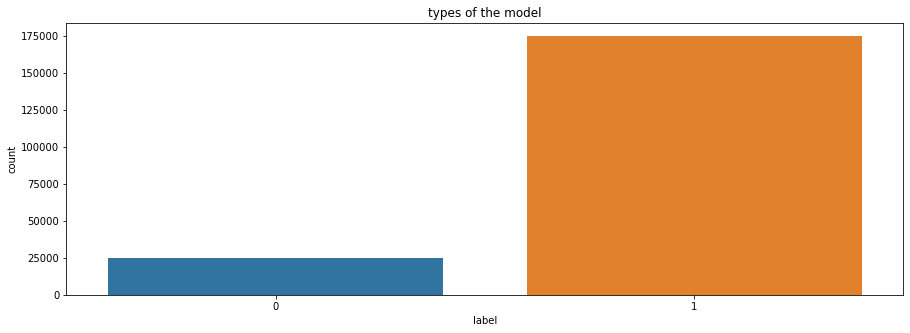

In [65]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='label' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.label.value_counts())
print('*'*20)
plt.show()

## The bar graph shows that the majority of people (176,707) have successfully repaid their loans, while only 25,314 are in default.

********************
6.0     171772
12.0     25117
0.0       3115
Name: maxamnt_loans30, dtype: int64
********************


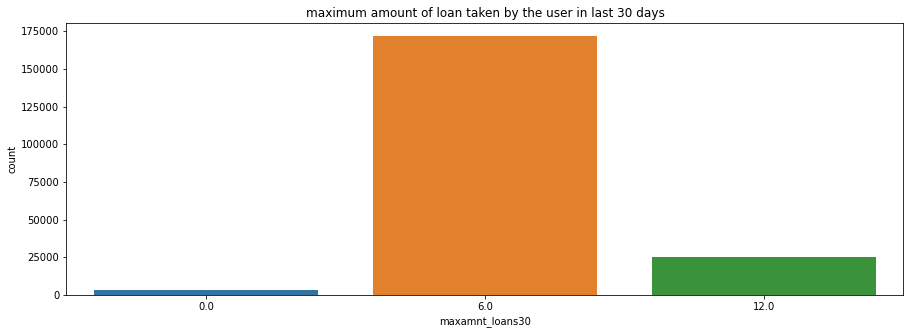

In [66]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='maxamnt_loans30' , data=df)
plt.title('maximum amount of loan taken by the user in last 30 days')
print('*'*20)
print(df.maxamnt_loans30.value_counts())
print('*'*20)
plt.show()

## The bar graph indicates that the most common loan amount taken was 5, to be repaid as 6, with 173507 individuals taking out this loan. Additionally, 25360 people took out a loan of 10, to be repaid as 12. Lastly, there are 3154 individuals who did not take out a loan.

********************
6     172590
12     25470
0       1944
Name: maxamnt_loans90, dtype: int64
********************


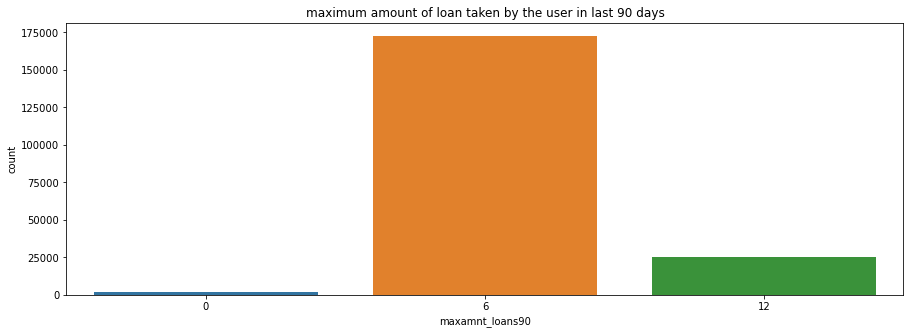

In [67]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='maxamnt_loans90' , data=df)
plt.title('maximum amount of loan taken by the user in last 90 days')
print('*'*20)
print(df.maxamnt_loans90.value_counts())
print('*'*20)
plt.show()

## According to the bar graph, the most frequently borrowed loan amount was 5, with a repayment rate of 6. This loan amount was taken out by 173507 individuals. There were also 25360 individuals who borrowed 10 with a repayment rate of 12. Lastly, the graph shows that 3154 people did not borrow any loan at all.

********************
7    82039
6    79067
8    38898
Name: month, dtype: int64
********************


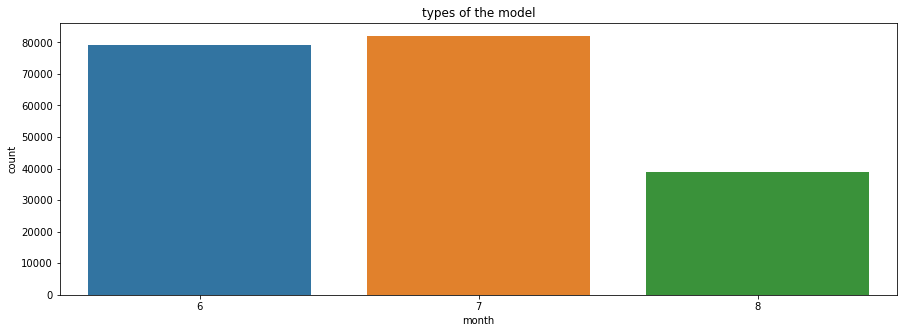

In [68]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='month' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.month.value_counts())
print('*'*20)
plt.show()

## The bar graph shows that the highest amount of loans were issued in the month of July with 82858, followed by June with 79890, and the least amount was issued in August with 39273.

********************
1     79573
2     40627
3     25852
4     16707
5     11158
6      7431
7      4839
8      3228
0      3115
9      2173
10     1505
11     1096
12      762
13      526
14      362
15      254
16      200
17      152
18       94
19       75
20       48
21       44
22       42
23       38
25       19
26       16
27       15
24       13
29        9
31        8
28        7
32        4
30        4
33        2
38        2
36        1
44        1
50        1
35        1
Name: cnt_loans30, dtype: int64
********************


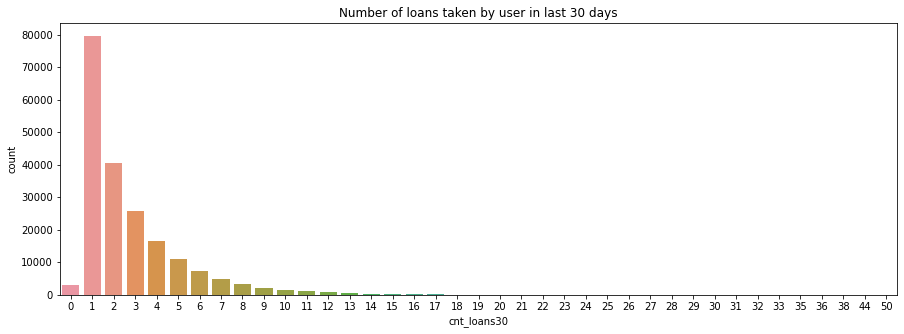

In [69]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='cnt_loans30' , data=df)
plt.title('Number of loans taken by user in last 30 days')
print('*'*20)
print(df.cnt_loans30.value_counts())
print('*'*20)
plt.show()

## The bar chart reveals that, based on the dataset, most people have only taken one loan within the past 30 days.

In [70]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 5))

   month     label
2      8  1.000000
1      7  0.849291
0      6  0.839807


7    82039
6    79067
8    38898
Name: month, dtype: int64




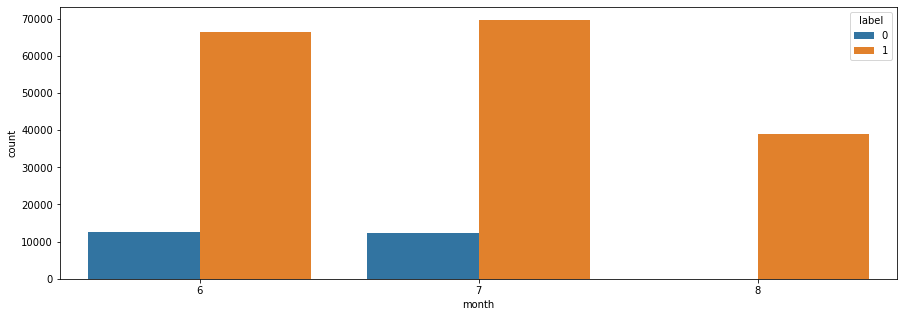

<Figure size 1080x360 with 0 Axes>

In [71]:
plt.figure(figsize = (15, 5))
graphs('month','label',df)

## The graph illustrates that in July (month 7), the highest number of loans were taken and 84.92% of those loans were successfully repaid. June (month 6) had the second highest number of loans taken with 83.98% repayment success rate. Lastly, August (month 8) had the least number of loans taken but had a 100% repayment success rate.

   maxamnt_loans30     label
0              0.0  1.000000
2             12.0  0.960744
1              6.0  0.860024


6.0     171772
12.0     25117
0.0       3115
Name: maxamnt_loans30, dtype: int64




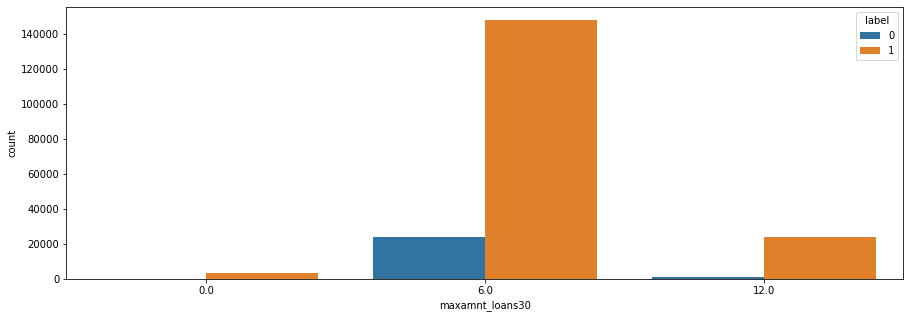

<Figure size 1080x360 with 0 Axes>

In [72]:
plt.figure(figsize = (15, 5))
graphs('maxamnt_loans30','label',df)

## The bar chart above displays the maximum amount of loans taken by users in the last 30 days versus the repayment amounts. It can be seen that when the loan amount is 5 and the repayment amount is 6, 86.00% (171772) of individuals successfully repay their loan within 30 days. Similarly, when the loan amount is 10 and the repayment amount is 12, 96.07% (25117) of individuals successfully repay their loan within 30 days. Additionally, the chart indicates that 3115 people did not take any loan.

   maxamnt_loans90     label
0                0  1.000000
2               12  0.961288
1                6  0.860687


6     172590
12     25470
0       1944
Name: maxamnt_loans90, dtype: int64




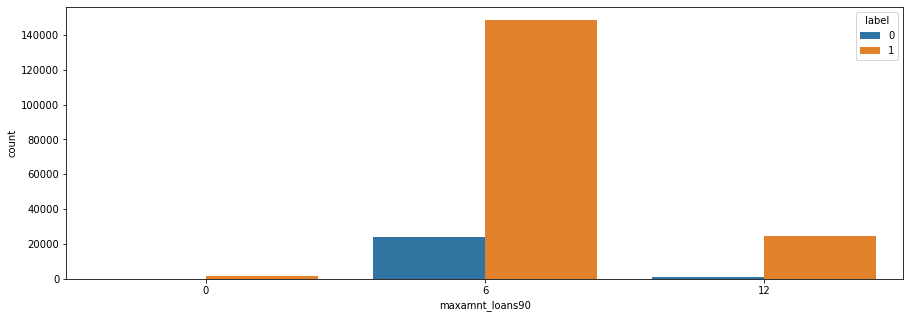

<Figure size 1080x360 with 0 Axes>

In [73]:
plt.figure(figsize = (15, 5))
graphs('maxamnt_loans90','label',df)

## The bar chart above illustrates the maximum amount of loans taken by users in the last 90 days in relation to the repayment amounts. It can be seen that when the loan amount is 5 and the repayment amount is 6, 86.06% (172590) of users successfully repay their loans within 90 days. On the other hand, when the loan amount is 10 and the repayment amount is 12, 96.12% (25470) of users successfully repay their loans within 90 days. Additionally, the chart also indicates that 1944 people did not take any loan during this period.

## Plotting the heatmap to observe Co-relation

In [74]:
corr=df.corr()
corr.shape

(35, 35)

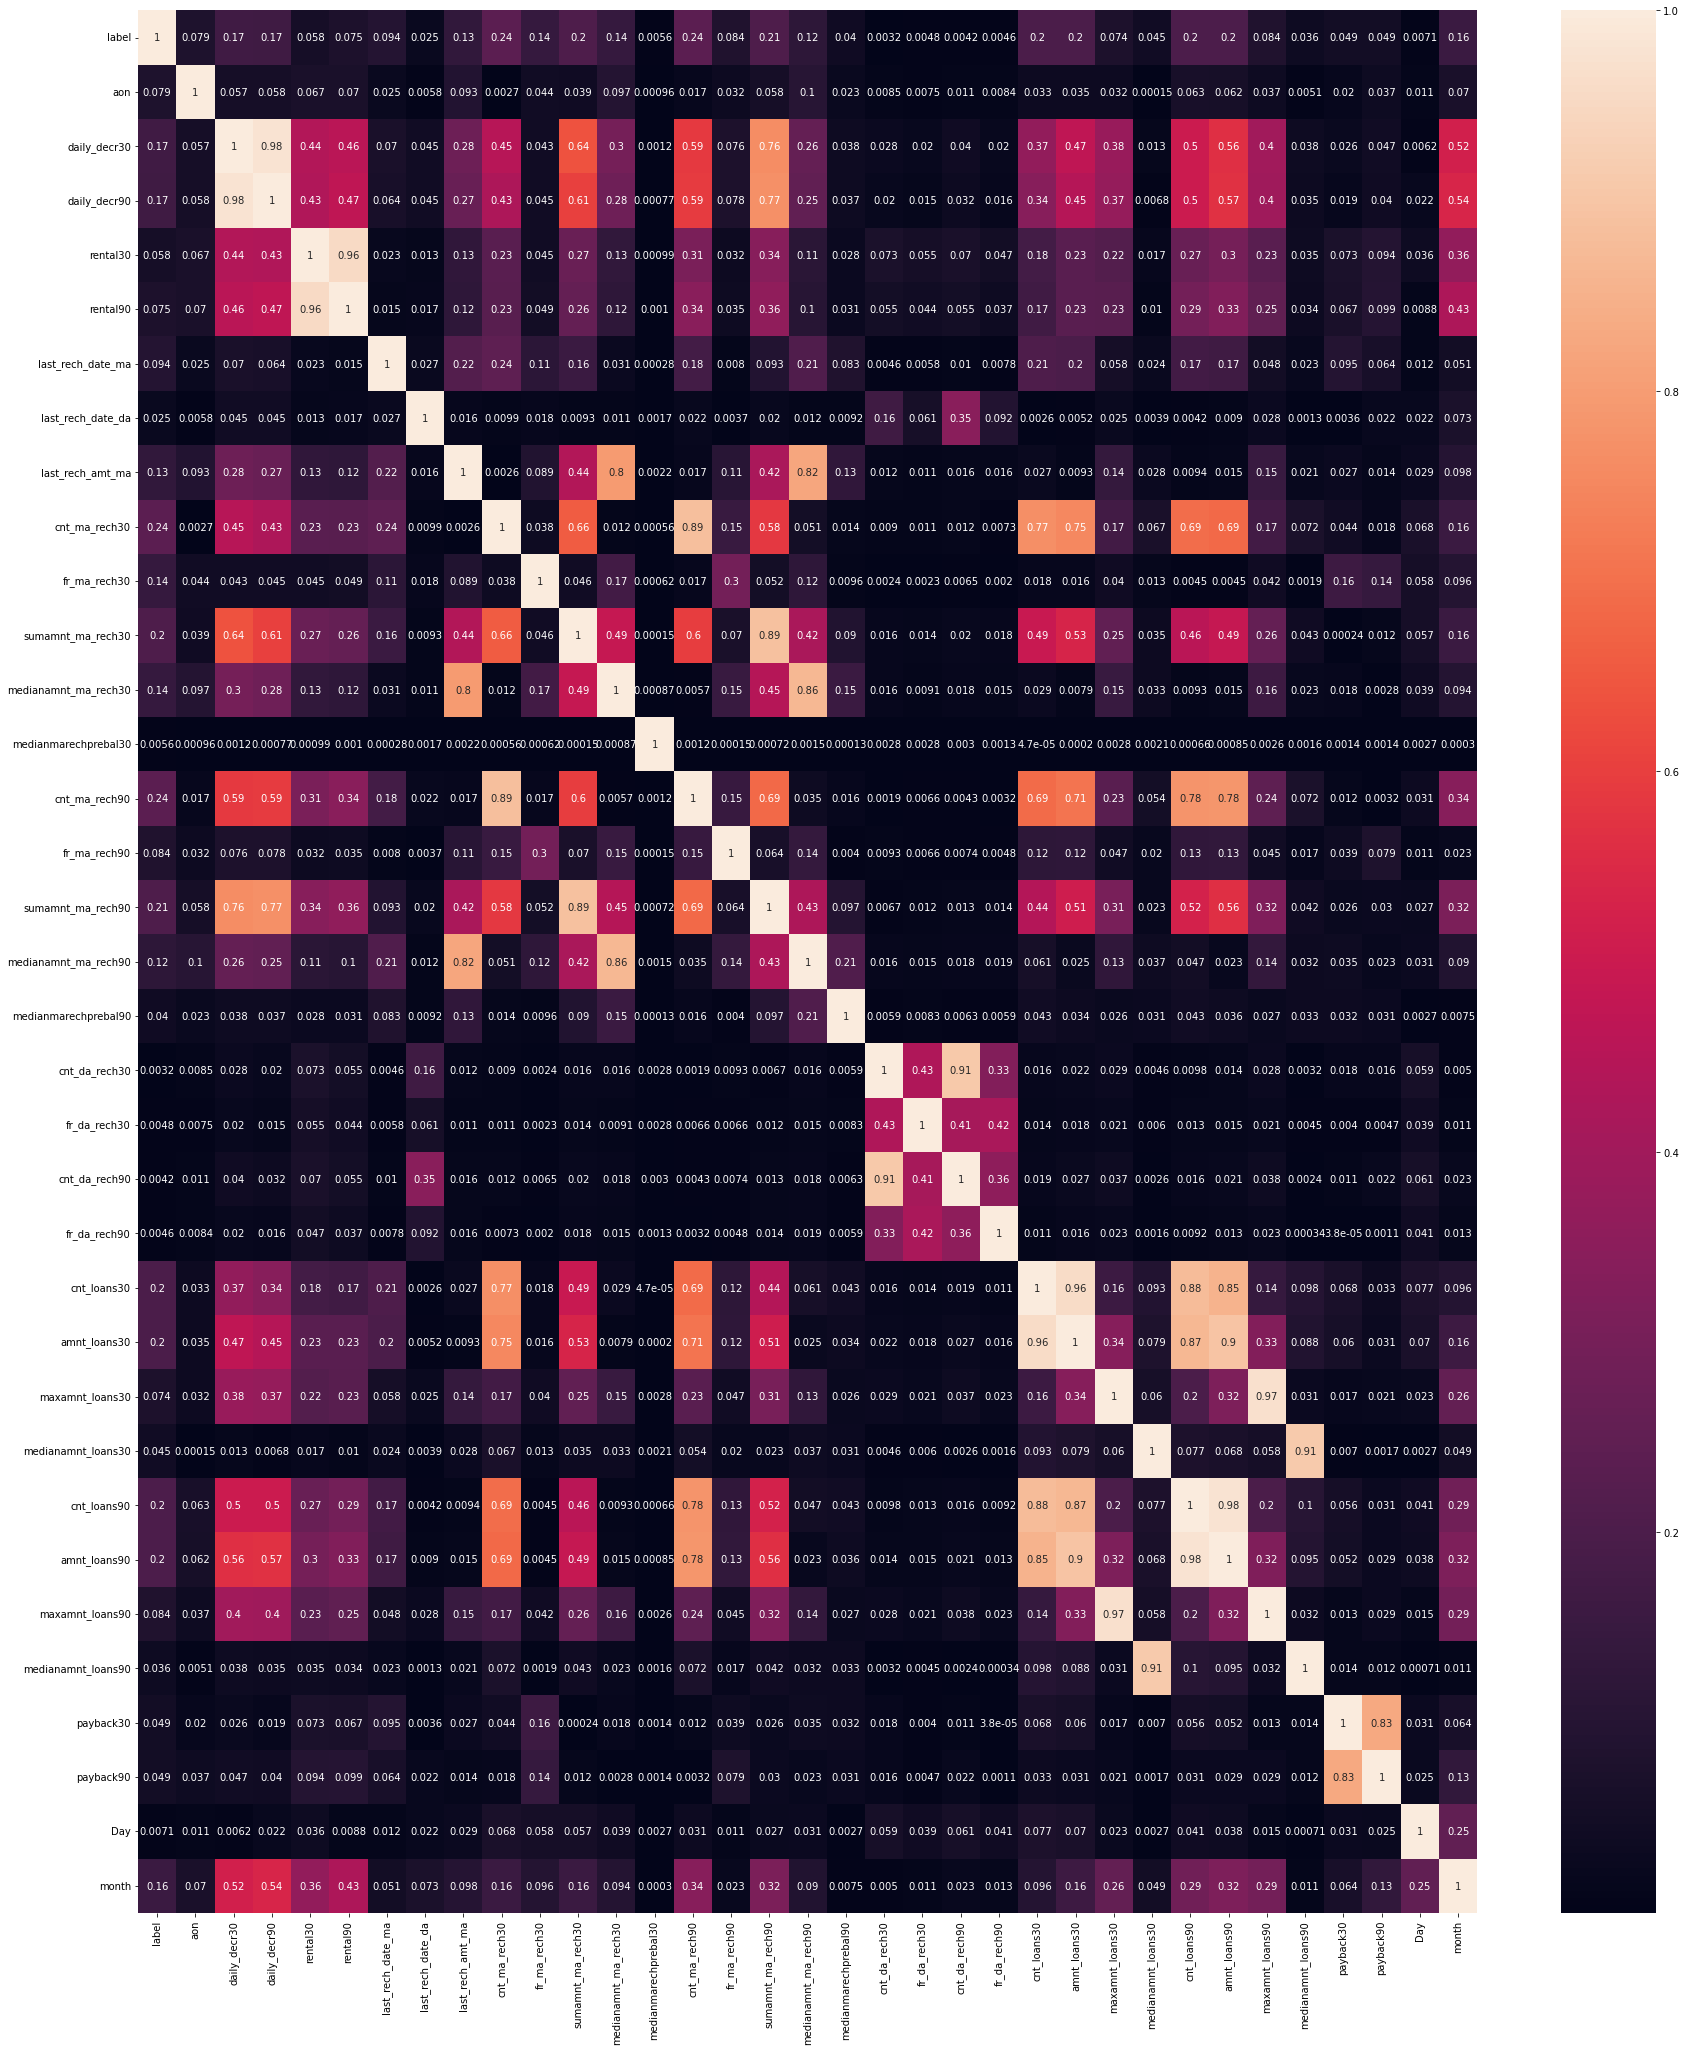

In [75]:
corr=df.corr().abs()
plt.figure(figsize=(30,35))
sns.heatmap(corr,annot=True)
plt.show()

## So from the above heat map, we observe and suspect that there is a problem of multi-colinearity exists as daily_derc30 vs daily_derc90 , rental30 vs rental90 , medianamnt_ma_rech30 vs last_rech_amt_ma , medianamnt_ma_rech30 vs last_rech_amt_ma , cnt_ma_rech90 vs cnt_ma_rech30 , sumamnt_ma_rech30 vs sumamnt_ma_rech90 , medianamnt_ma_rech30 vs medianamnt_ma_rech90 , cnt_da_rech30 vs cnt_da_rech90 , amnt_loans30 vs cnt_loans30 , cnt_loans90 vs cnt_loans30 , amnt_loans90 vs cnt_loans30 , amnt_loans30 vs cnt_loans90 , amnt_loans30 vs amnt_loans90 , cnt_loans90 vs amnt_loans90 , payback30 vs payback90 are very highly co-related so we will make sure by scatter plot and if we find trend we will drop that column that contributes less to our label.

In [76]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'month'],
      dtype='object')

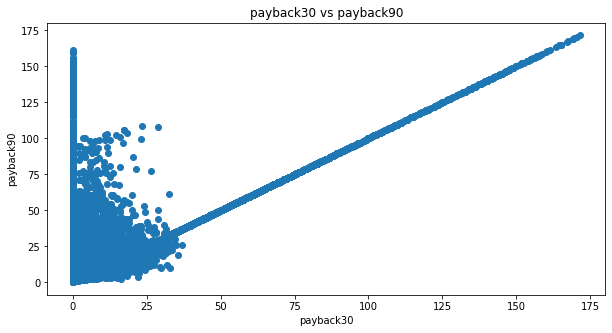

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(df['payback30'],df['payback90'])
plt.xlabel('payback30')
plt.ylabel('payback90')
plt.title('payback30 vs payback90')
plt.show()

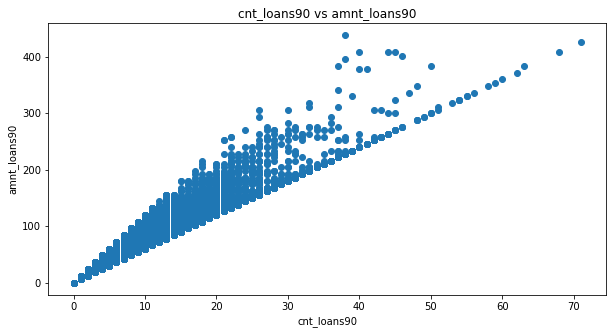

In [78]:
plt.figure(figsize=(10,5))
plt.scatter(df['cnt_loans90'],df['amnt_loans90'])
plt.xlabel('cnt_loans90')
plt.ylabel('amnt_loans90')
plt.title('cnt_loans90 vs amnt_loans90')
plt.show()

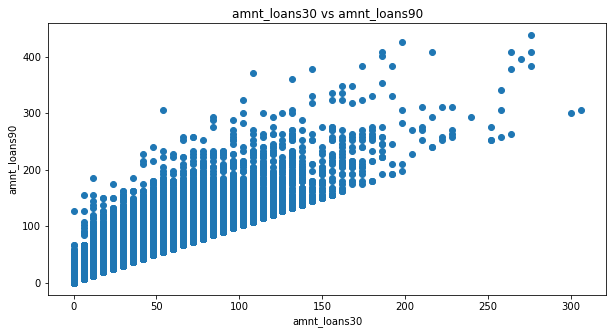

In [79]:
plt.figure(figsize=(10,5))
plt.scatter(df['amnt_loans30'],df['amnt_loans90'])
plt.xlabel('amnt_loans30')
plt.ylabel('amnt_loans90')
plt.title('amnt_loans30 vs amnt_loans90')
plt.show()

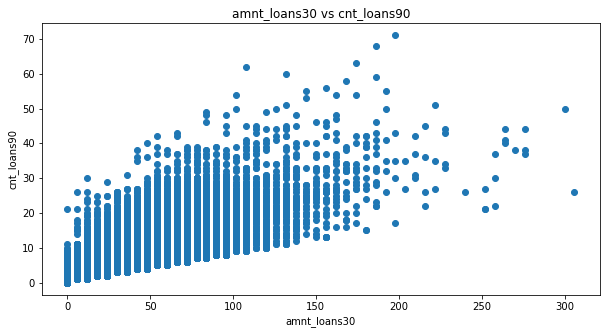

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(df['amnt_loans30'],df['cnt_loans90'])
plt.xlabel('amnt_loans30')
plt.ylabel('cnt_loans90')
plt.title('amnt_loans30 vs cnt_loans90')
plt.show()

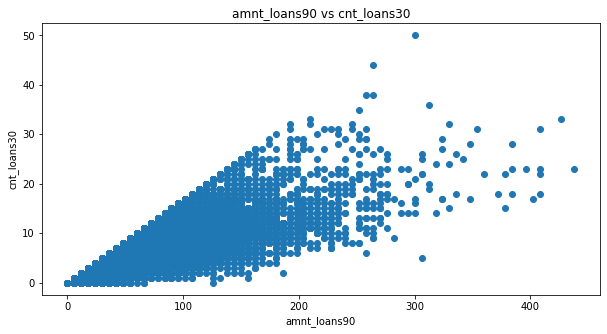

In [81]:
plt.figure(figsize=(10,5))
plt.scatter(df['amnt_loans90'],df['cnt_loans30'])
plt.xlabel('amnt_loans90')
plt.ylabel('cnt_loans30')
plt.title('amnt_loans90 vs cnt_loans30')
plt.show()

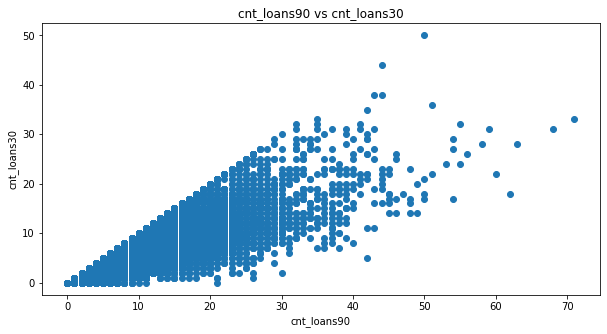

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(df['cnt_loans90'],df['cnt_loans30'])
plt.xlabel('cnt_loans90')
plt.ylabel('cnt_loans30')
plt.title('cnt_loans90 vs cnt_loans30')
plt.show()

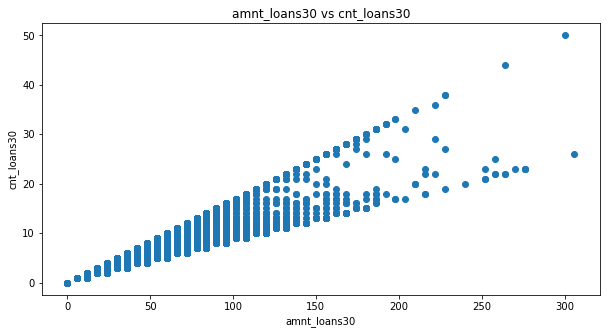

In [83]:
plt.figure(figsize=(10,5))
plt.scatter(df['amnt_loans30'],df['cnt_loans30'])
plt.xlabel('amnt_loans30')
plt.ylabel('cnt_loans30')
plt.title('amnt_loans30 vs cnt_loans30')
plt.show()

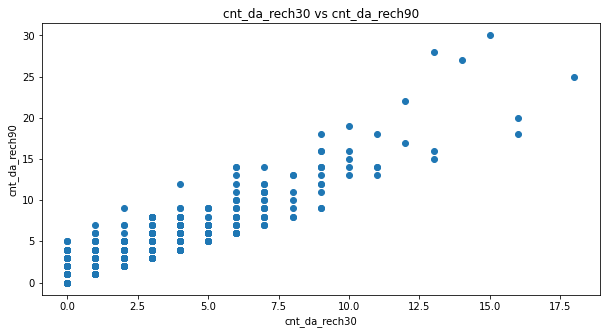

In [84]:
plt.figure(figsize=(10,5))
plt.scatter(df['cnt_da_rech30'],df['cnt_da_rech90'])
plt.xlabel('cnt_da_rech30')
plt.ylabel('cnt_da_rech90')
plt.title('cnt_da_rech30 vs cnt_da_rech90')
plt.show()

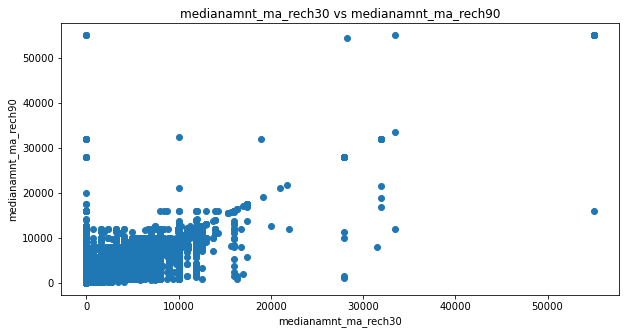

In [85]:
plt.figure(figsize=(10,5))
plt.scatter(df['medianamnt_ma_rech30'],df['medianamnt_ma_rech90'])
plt.xlabel('medianamnt_ma_rech30')
plt.ylabel('medianamnt_ma_rech90')
plt.title('medianamnt_ma_rech30 vs medianamnt_ma_rech90')
plt.show()

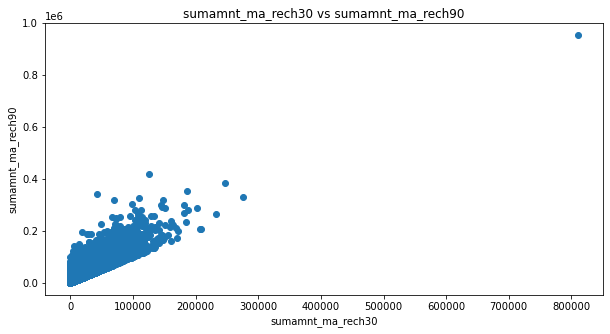

In [86]:
plt.figure(figsize=(10,5))
plt.scatter(df['sumamnt_ma_rech30'],df['sumamnt_ma_rech90'])
plt.xlabel('sumamnt_ma_rech30')
plt.ylabel('sumamnt_ma_rech90')
plt.title('sumamnt_ma_rech30 vs sumamnt_ma_rech90')
plt.show()

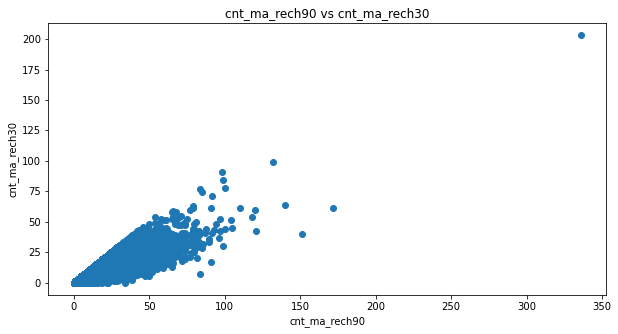

In [87]:
plt.figure(figsize=(10,5))
plt.scatter(df['cnt_ma_rech90'],df['cnt_ma_rech30'])
plt.xlabel('cnt_ma_rech90')
plt.ylabel('cnt_ma_rech30')
plt.title('cnt_ma_rech90 vs cnt_ma_rech30')
plt.show()

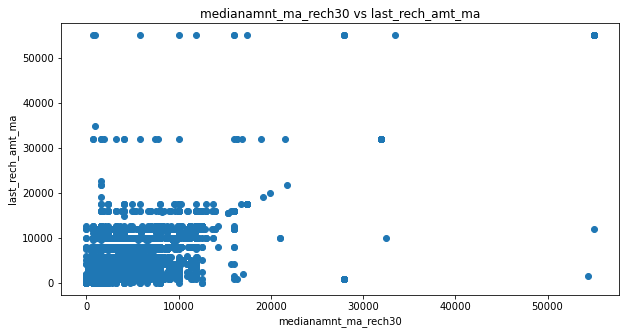

In [88]:
plt.figure(figsize=(10,5))
plt.scatter(df['medianamnt_ma_rech90'],df['last_rech_amt_ma'])
plt.xlabel('medianamnt_ma_rech30')
plt.ylabel('last_rech_amt_ma')
plt.title('medianamnt_ma_rech30 vs last_rech_amt_ma')
plt.show()

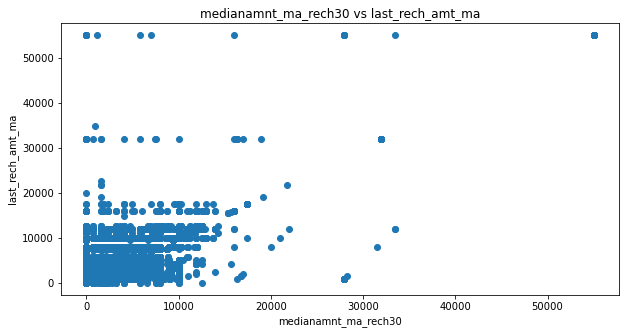

In [89]:
plt.figure(figsize=(10,5))
plt.scatter(df['medianamnt_ma_rech30'],df['last_rech_amt_ma'])
plt.xlabel('medianamnt_ma_rech30')
plt.ylabel('last_rech_amt_ma')
plt.title('medianamnt_ma_rech30 vs last_rech_amt_ma')
plt.show()

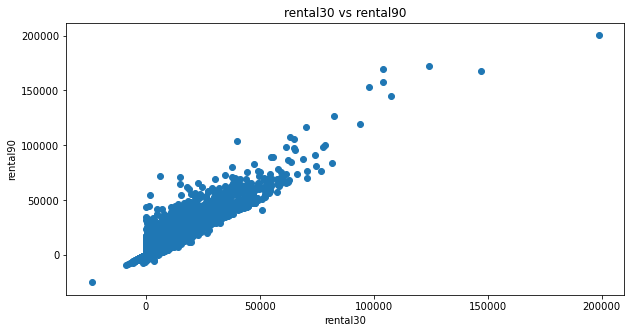

In [90]:
plt.figure(figsize=(10,5))
plt.scatter(df['rental30'],df['rental90'])
plt.xlabel('rental30')
plt.ylabel('rental90')
plt.title('rental30 vs rental90')
plt.show()

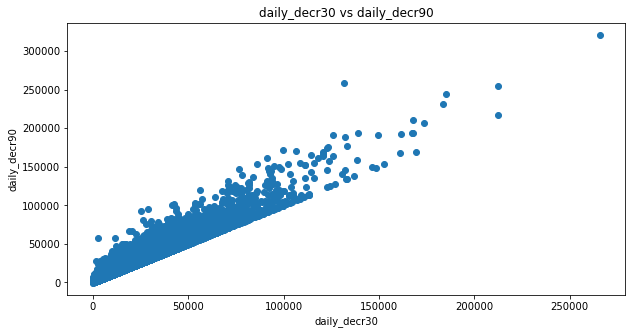

In [91]:
plt.figure(figsize=(10,5))
plt.scatter(df['daily_decr30'],df['daily_decr90'])
plt.xlabel('daily_decr30')
plt.ylabel('daily_decr90')
plt.title('daily_decr30 vs daily_decr90')
plt.show()

## From the scatter plots, it is clear that there is a problem of multi-colinearity. To address this, we will remove features that have a weaker correlation with our label in the VIF step.

In [92]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'month'],
      dtype='object')

## Splitting the label and feature to apply SMOTE

In [93]:
# seperate label n feature
X=df.drop('label' , axis=1)
y=df.label

In [94]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [96]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({1: 131301, 0: 18702})

## Import SMOTE

In [97]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE


In [98]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({1: 131301, 0: 18702})
the number of classes after fit:  Counter({1: 131301, 0: 98475})


## Plotting Histogram plot to see how data is distributed on an interval scale.

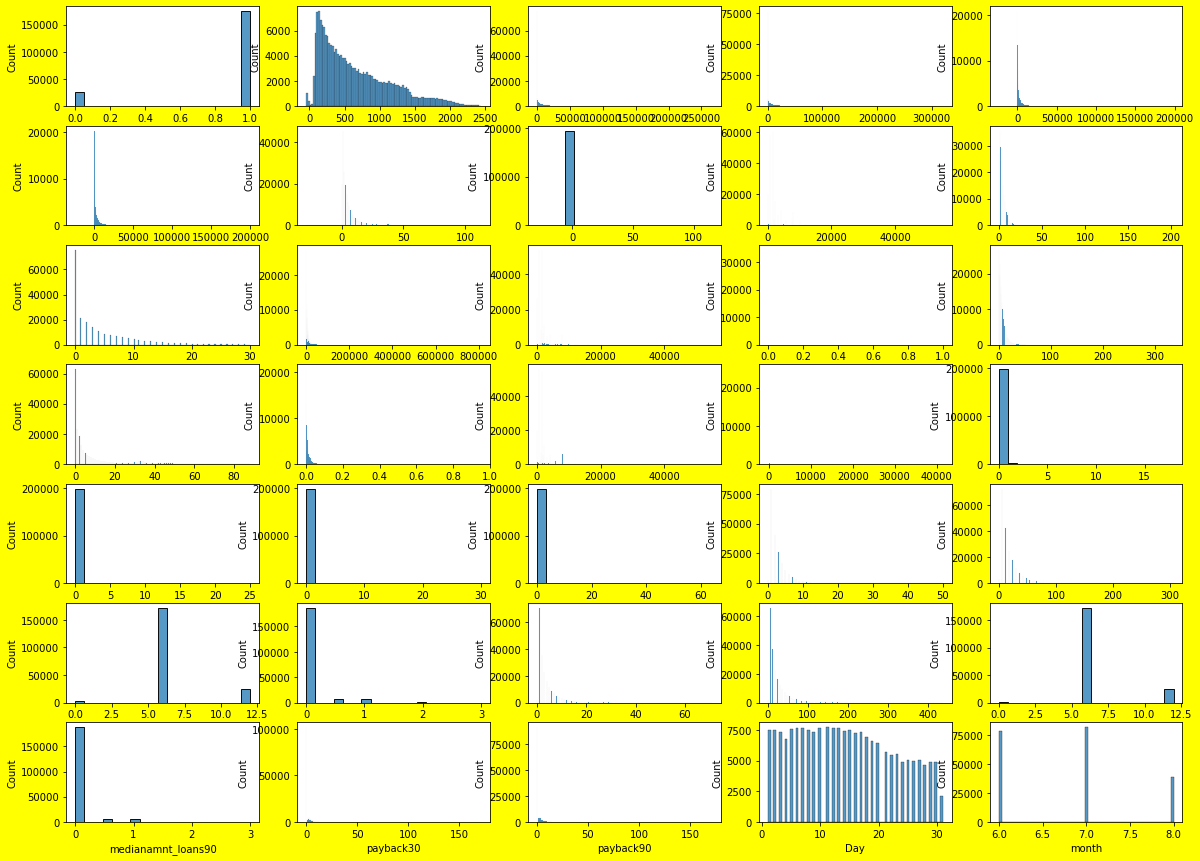

In [99]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 35:
        ax = plt.subplot(7,5,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Distribution plot to see how data is distributed

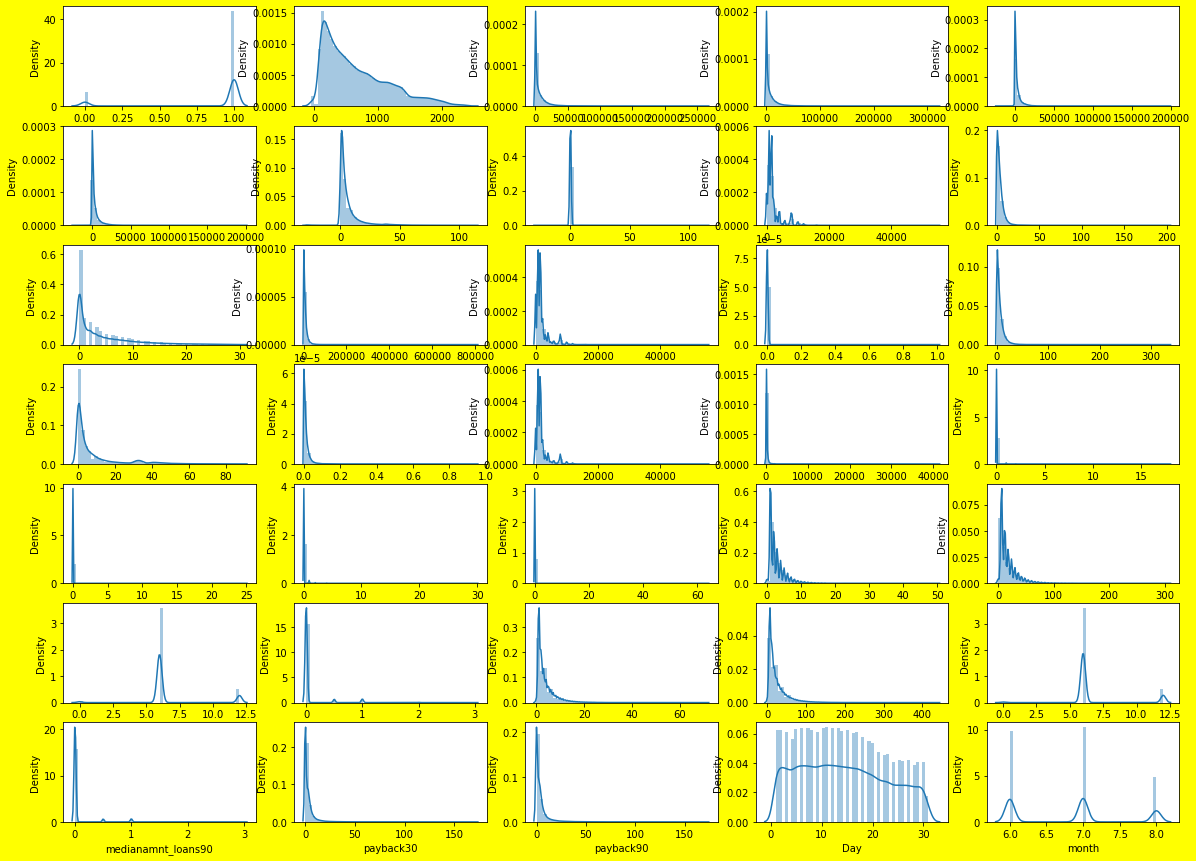

In [100]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the above histogram and distribution plot, we observe there is skewness in continuous data and the data has outliers.

## Plotting Scatter plot to see realtion between feature and label

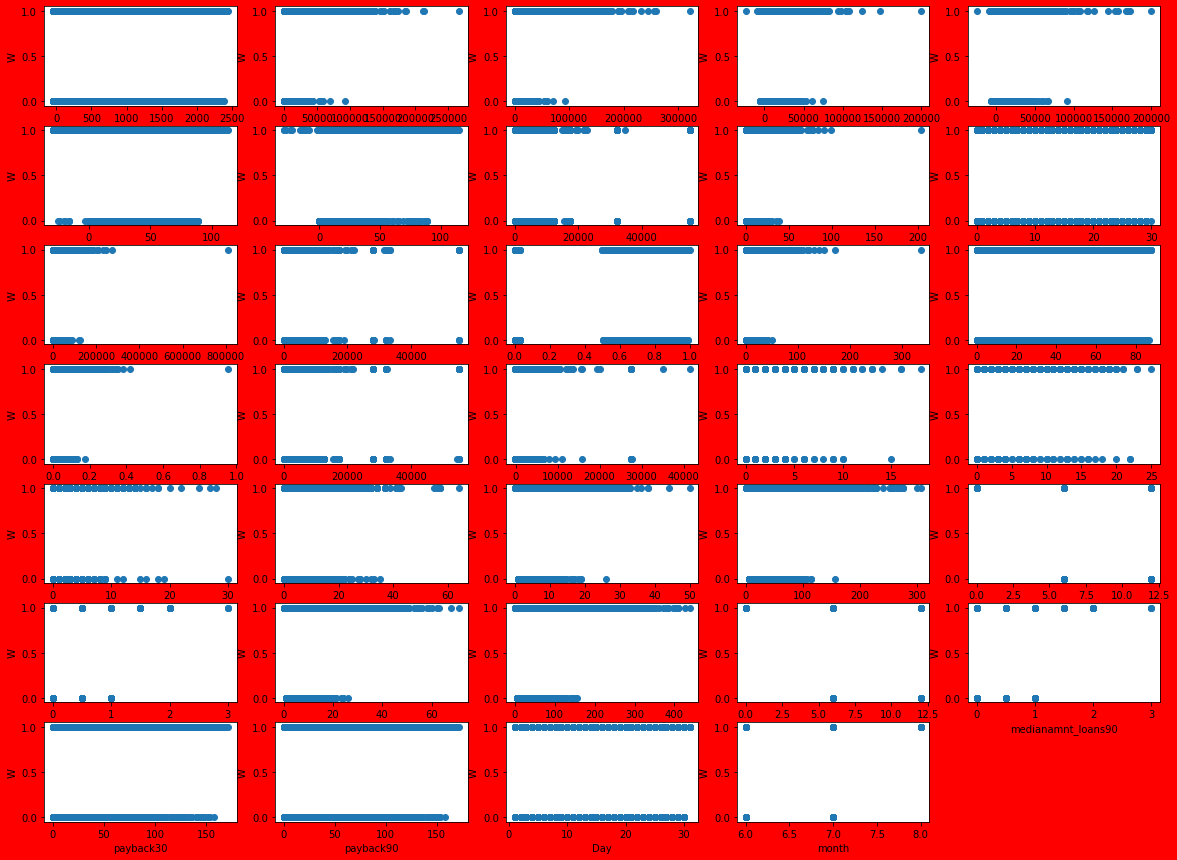

In [101]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 35:
        ax = plt.subplot(7,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see realtion between feature and label

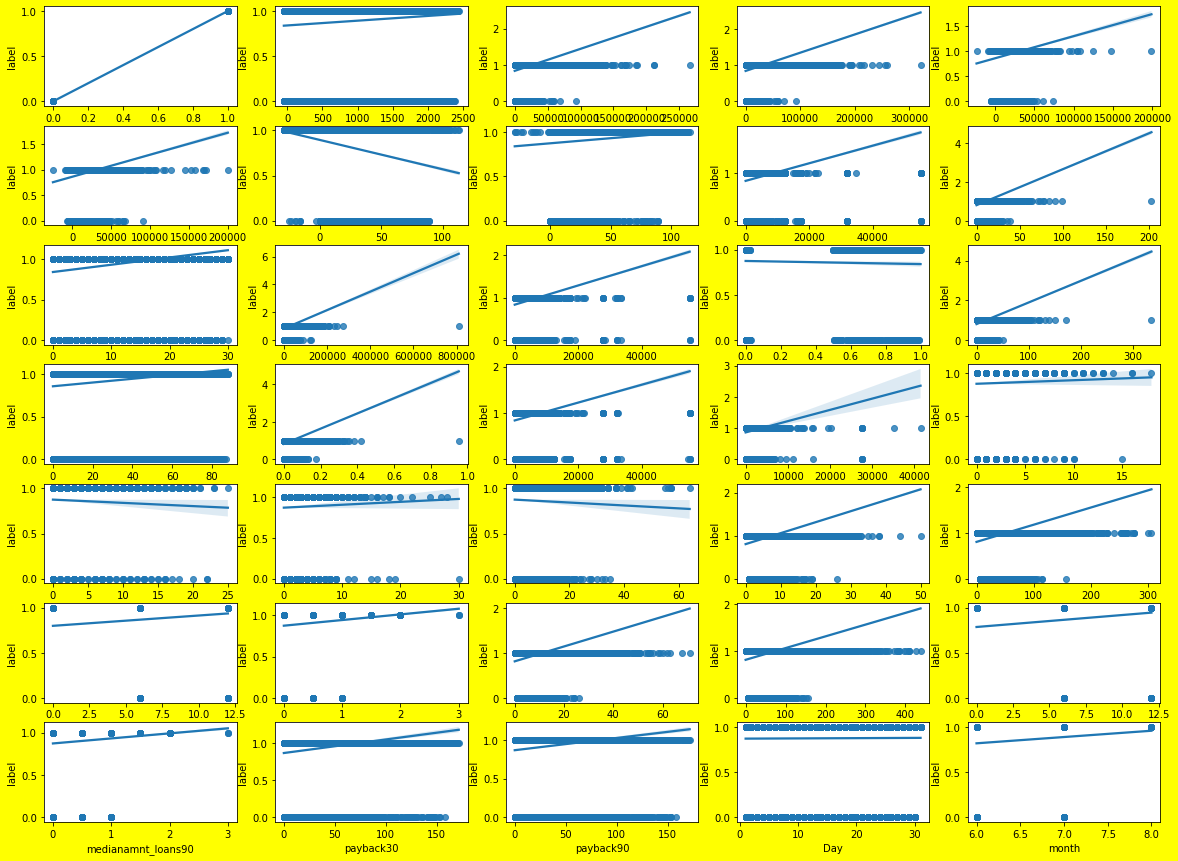

In [102]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 35:
        ax = plt.subplot(7,5,plotnumber)
        sns.regplot (df[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the above scatter plot and Regression plot we observe most of the features are positively and negatively co-related to our label (Label).
​

## Plotting Box plot to see outliers

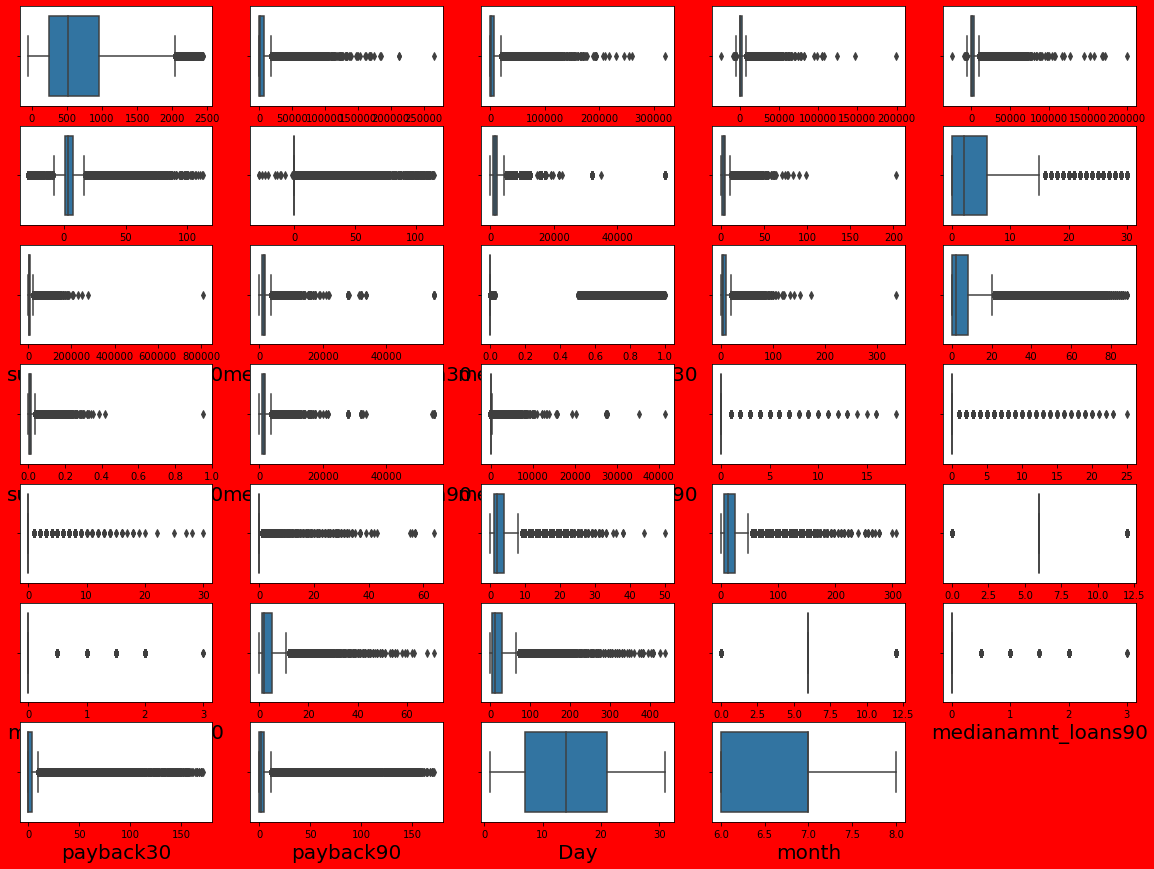

In [103]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in X:
    
    if graph <= 35:
        plt.subplot (7,5,graph)
        ax = sns.boxplot(X[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## From the above box plot, we observe most of the features having outliers, and we going to treat it with a Z score.

## Treating Outliers with Z-score Method

In [104]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [105]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.8 ).all(axis=1)

df = df[filtering_entry]

df.describe()



,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,month
count,137613.000000,137613.000000,137613.000000,137613.000000,137613.000000,137613.000000,137613.000000,137613.0,137613.000000,137613.000000,...,137613.000000,137613.000000,137613.000000,137613.000000,137613.000000,137613.000000,137613.000000,137613.000000,137613.000000,137613.000000
mean,0.856220,626.253057,3548.757323,3890.936682,1925.904733,2405.922907,4.688983,0.0,1558.567730,3.538292,...,6.565150,0.015464,3.213744,20.128447,6.571385,0.012215,2.632303,3.148796,14.361259,6.697202
std,0.350868,475.683588,5365.250908,6077.459025,2621.963794,3356.762406,5.579508,0.0,1469.289254,3.034716,...,1.752578,0.086561,2.703859,17.092595,1.761207,0.077192,4.102852,4.732947,8.374231,0.715950
min,0.000000,-48.000000,-41.755000,-41.755000,-7786.750000,-7786.750000,-20.000000,0.0,0.000000,0.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,231.000000,30.981333,31.075333,236.400000,255.500000,1.000000,0.0,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,496.000000,747.226000,751.420000,876.590000,1043.010000,3.000000,0.0,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.500000,14.000000,7.000000
75%,1.000000,923.000000,5300.048000,5567.360000,2523.200000,3156.690000,6.000000,0.0,1547.000000,5.000000,...,6.000000,0.000000,4.000000,30.000000,6.000000,0.000000,4.000000,4.500000,21.000000,7.000000
max,1.000000,2053.000000,31195.000000,36690.490000,14783.060000,19654.300000,32.000000,0.0,8000.000000,15.000000,...,12.000000,0.500000,14.000000,96.000000,12.000000,0.500000,28.000000,33.142857,31.000000,8.000000


In [106]:
df.shape

(137613, 35)

## Scaling the data¶

In [107]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Checking for the multicollinearity Using VIF

In [108]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.026929,aon
1,31.447138,daily_decr30
2,34.320418,daily_decr90
3,13.304482,rental30
4,14.185405,rental90
5,1.341784,last_rech_date_ma
6,1.347522,last_rech_date_da
7,3.625015,last_rech_amt_ma
8,15.356771,cnt_ma_rech30
9,1.191755,fr_ma_rech30


In [109]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'month'],
      dtype='object')

## Removing The features whose VIF is More than 10

In [110]:
X = df.drop(['label','daily_decr30','daily_decr90','rental30','rental90','cnt_ma_rech30','sumamnt_ma_rech30','cnt_ma_rech90','sumamnt_ma_rech90','cnt_loans30','amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90'],axis = 1)
y = df['label']

In [111]:
df.reset_index()

,index,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,month
0,1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
1,2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
2,4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
3,5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,2,7
4,6,1,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137608,209585,1,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,2309,...,6.0,0.0,5.0,30,6,0.0,5.200000,5.200000,4,7
137609,209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
137610,209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
137611,209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7


In [112]:
X

,aon,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,medianamnt_loans30,medianamnt_loans90,payback30,payback90,Day,month
1,712.0,20.0,0.0,5787,0.0,5787.0,61.04,0,5787.0,61.04,0.0,0.0,0,0,0.0,0.0,0.000000,0.000000,10,8
2,535.0,3.0,0.0,1539,0.0,1539.0,66.32,0,1539.0,66.32,0.0,0.0,0,0,0.0,0.0,0.000000,0.000000,19,8
4,947.0,4.0,0.0,2309,2.0,2309.0,29.00,2,2888.0,35.00,0.0,0.0,0,0,0.0,0.0,2.333333,2.333333,22,6
5,568.0,2.0,0.0,1539,10.0,1539.0,15.40,0,1539.0,55.90,0.0,0.0,0,0,0.0,0.0,11.000000,8.333333,2,7
6,545.0,13.0,0.0,5787,0.0,5787.0,277.80,0,5787.0,277.80,0.0,0.0,0,0,0.0,0.0,0.000000,0.000000,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209585,793.0,2.0,0.0,2309,16.0,1924.0,34.00,16,1924.0,34.00,0.0,0.0,0,0,0.0,0.0,5.200000,5.200000,4,7
209588,404.0,1.0,0.0,4048,2.0,3178.0,91.81,2,3178.0,91.81,0.0,0.0,0,0,0.0,0.0,1.000000,1.000000,17,6
209589,1075.0,4.0,0.0,773,1.0,773.0,161.30,2,773.0,111.80,0.0,0.0,0,0,0.0,0.0,1.000000,1.000000,12,6
209590,1013.0,3.0,0.0,1539,8.0,1539.0,51.13,5,1539.0,47.13,0.0,0.0,0,0,0.0,0.0,4.000000,3.833333,29,7


## Finding correlation between feature n lable using CORR method

In [113]:
#  (code type      --   feature corrwith label)

df.drop('label' , axis =1 ).corrwith (df.label)

aon                     0.083546
daily_decr30            0.192960
daily_decr90            0.193103
rental30                0.050594
rental90                0.071031
last_rech_date_ma      -0.032130
last_rech_date_da            NaN
last_rech_amt_ma        0.179759
cnt_ma_rech30           0.310445
fr_ma_rech30            0.190339
sumamnt_ma_rech30       0.281429
medianamnt_ma_rech30    0.184039
medianmarechprebal30    0.123035
cnt_ma_rech90           0.310334
fr_ma_rech90            0.127320
sumamnt_ma_rech90       0.283107
medianamnt_ma_rech90    0.178066
medianmarechprebal90    0.137065
cnt_da_rech30                NaN
fr_da_rech30                 NaN
cnt_da_rech90                NaN
fr_da_rech90                 NaN
cnt_loans30             0.257588
amnt_loans30            0.261594
maxamnt_loans30         0.087331
medianamnt_loans30      0.041623
cnt_loans90             0.260434
amnt_loans90            0.262016
maxamnt_loans90         0.088354
medianamnt_loans90      0.031041
payback30 

<AxesSubplot:title={'center':'Correlation with target'}>

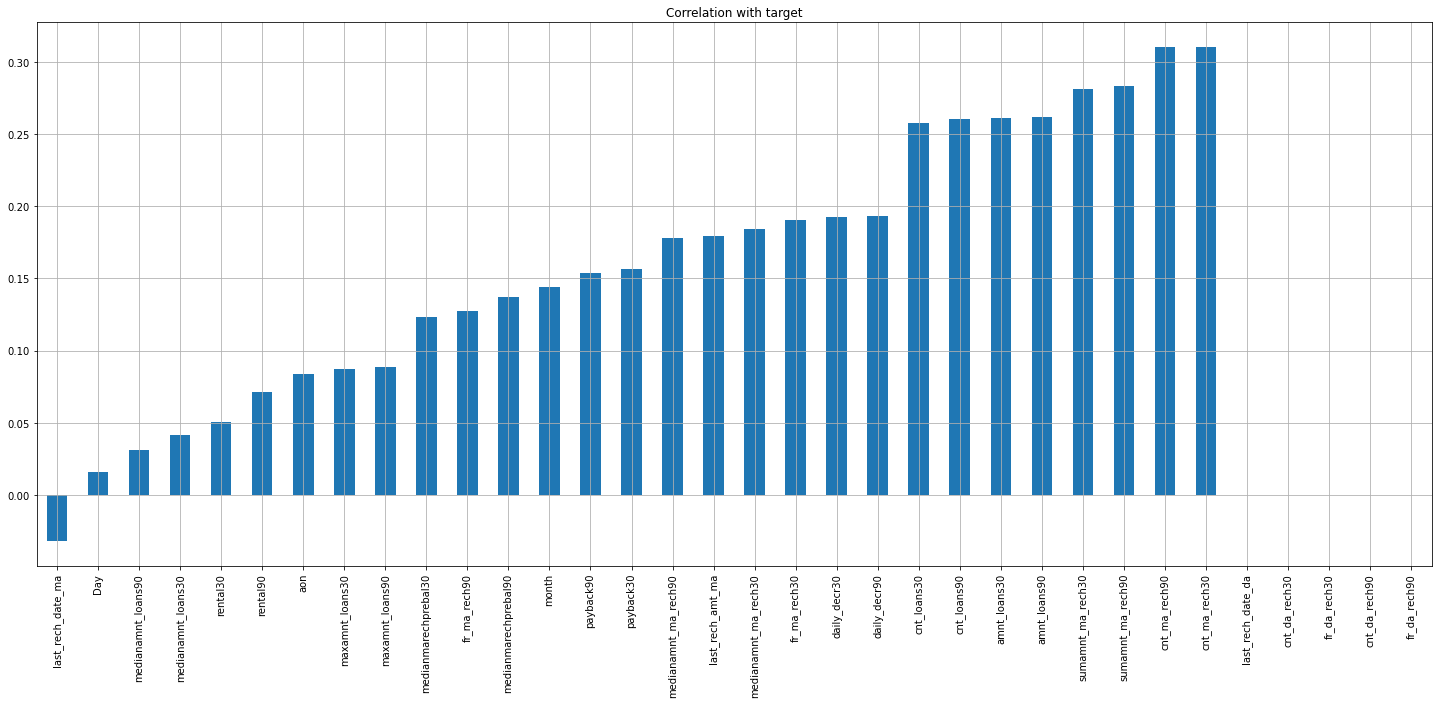

In [114]:
#  (code type      --   feature corrwith label)

df.drop('label' , axis =1 ).corrwith (df.label).sort_values().plot(kind='bar',grid=True,figsize=(25,10),title='Correlation with target')

## Feature selection with SelectKBest

In [115]:
# selecting 14 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

In [116]:
#select best feature
# selecting 14 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

best_feature = SelectKBest(score_func=f_classif , k=14)

fit = best_feature.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_column = pd.DataFrame(X.columns)

feature_scores = pd.concat ([df_column , df_scores ] , axis =1)

feature_scores.columns=['Feature_Name' , 'Scores']

print (feature_scores.nlargest (14 , 'Scores'))

            Feature_Name       Scores
4           fr_ma_rech30  5172.923158
5   medianamnt_ma_rech30  4824.350813
3       last_rech_amt_ma  4595.134971
8   medianamnt_ma_rech90  4506.155266
16             payback30  3463.624319
17             payback90  3336.313097
19                 month  2922.235374
9   medianmarechprebal90  2634.752741
7           fr_ma_rech90  2267.470698
6   medianmarechprebal30  2115.110873
0                    aon   967.273615
14    medianamnt_loans30   238.826807
1      last_rech_date_ma   142.207721
15    medianamnt_loans90   132.725988


## we selected top 14 feature from feature selection technique

In [117]:
#Model BUilding
new_X = df[['fr_ma_rech30','medianamnt_ma_rech30','last_rech_amt_ma','medianamnt_ma_rech90','payback30','payback90','month','medianmarechprebal90','fr_ma_rech90','medianmarechprebal30','aon','medianamnt_loans30','last_rech_date_ma','medianamnt_loans90' ]]

In [118]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

# DecisionTreeClassifier Model

In [119]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Finding the Best Random State

In [120]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.821357981630043 RandomState 1


MAXINING TESTING SCORE 0.821357981630043 ON RANDOM STATE OF 1
Testing Accuracy 0.8144401813742588 RandomState 2


Testing Accuracy 0.8146145797000349 RandomState 3


Testing Accuracy 0.817899081502151 RandomState 4


Testing Accuracy 0.8182188117660737 RandomState 5


Testing Accuracy 0.8177828159516335 RandomState 6


Testing Accuracy 0.8183932100918497 RandomState 7


Testing Accuracy 0.8174921520753401 RandomState 8


Testing Accuracy 0.821270782467155 RandomState 9


Testing Accuracy 0.816562027671201 RandomState 10


Testing Accuracy 0.8201953261248692 RandomState 11


Testing Accuracy 0.816300430182537 RandomState 12


Testing Accuracy 0.8187420067434019 RandomState 13


Testing Accuracy 0.8202243925124986 RandomState 14


Testing Accuracy 0.8167945587722358 RandomState 15


Testing Accuracy 0.8167945587722358 RandomState 16


Testing Accuracy 0.8165038948959423 RandomState 17


Testing Accuracy 0.8178700151145216 RandomState 18


In [121]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8222590396465528 On Random State 86


### Training the model

In [122]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=86)

In [123]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [126]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [127]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 96.523559%
====Testing Score====
Accuracy score : 82.333450%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.40      0.45      0.42      4945
           1       0.91      0.89      0.90     29459

    accuracy                           0.82     34404
   macro avg       0.65      0.67      0.66     34404
weighted avg       0.83      0.82      0.83     34404



## Model Score
    Training Score = 96.523559%
    Testing Score = 82.272410%

# Hyperparameter For DecisionTree Classifier

In [128]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [129]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [130]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [131]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [132]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 3, min_samples_leaf= 1, min_samples_split= 5)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [133]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 86.492457%
====Testing Score====
Accuracy score : 86.652715%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.68      0.14      0.23      4945
           1       0.87      0.99      0.93     29459

    accuracy                           0.87     34404
   macro avg       0.77      0.56      0.58     34404
weighted avg       0.84      0.87      0.83     34404



## Model Scores With Hyperparameter Tuning
    Training Score = 86.492457%
    Testing Score = 86.652715%

## Cross-Validation Score For DecisionTree Classifier

In [134]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_dt,X_scalar,y,cv=6)

array([0.86566969, 0.86375131, 0.86667248, 0.86553303, 0.8646174 ,
       0.86570743])

In [135]:
cross_val_score(clf_dt,X_scalar,y,cv=6).mean()

0.8653252227783046

## Confusion Matrix DecisionTree Classifier

In [136]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[  678,  4267],
       [  325, 29134]], dtype=int64)

## AUC-ROC Curve for Training Data

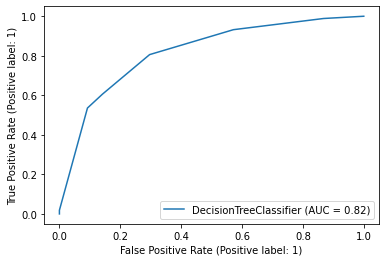

In [207]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf_dt, X_train_ns,y_train_ns)

##  AUC-ROC Curve for Testing Data

In [146]:
from sklearn.metrics import RocCurveDisplay

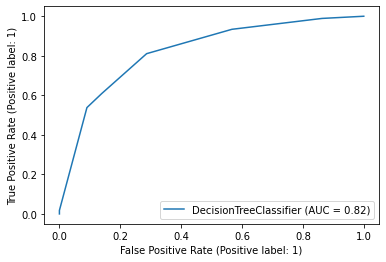

In [149]:
RocCurveDisplay.from_estimator(clf_dt, X_test, y_test)

# RandomForest Classifier Model

In [150]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Finding the Best Random State

In [151]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8653354261132427 RandomState 1


MAXINING TESTING SCORE 0.8653354261132427 ON RANDOM STATE OF 1
Testing Accuracy 0.86056853854203 RandomState 2


Testing Accuracy 0.8626903848389722 RandomState 3


Testing Accuracy 0.8639693058946634 RandomState 4


Testing Accuracy 0.8612079990698756 RandomState 5


Testing Accuracy 0.8625159865131962 RandomState 6


Testing Accuracy 0.8611207999069875 RandomState 7


Testing Accuracy 0.8634461109173351 RandomState 8


Testing Accuracy 0.8626903848389722 RandomState 9


Testing Accuracy 0.8614986629461691 RandomState 10


Testing Accuracy 0.8610917335193582 RandomState 11


Testing Accuracy 0.8612370654575049 RandomState 12


Testing Accuracy 0.8618183932100919 RandomState 13


Testing Accuracy 0.8641146378328102 RandomState 14


Testing Accuracy 0.8637077084059993 RandomState 15


Testing Accuracy 0.8637949075688873 RandomState 16


Testing Accuracy 0.861324264620393 RandomState 17


Testing Accuracy 0.862254389024532 RandomState 1

In [152]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8653354261132427 On Random State 1


### Training the model

In [157]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=1)

In [158]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [159]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [160]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 96.520652%
====Testing Score====
Accuracy score : 86.617835%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.53      0.34      0.41      4797
           1       0.90      0.95      0.92     29607

    accuracy                           0.87     34404
   macro avg       0.72      0.65      0.67     34404
weighted avg       0.85      0.87      0.85     34404



## Model Scores
    Training Score = 96.520652%
    Testing Score = 86.617835%

## Hyperparameter For RandomForestClassifier

In [161]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,10),
               'min_samples_split' :range(1,3),
               'min_samples_leaf':range(1,3)}

In [162]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [163]:
#pass dataset to train 
grd.fit(X_train_ns,y_train_ns)
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 4}


In [164]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 9, min_samples_leaf= 2, min_samples_split= 7,n_estimators= 4)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=4)

In [165]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 86.963346%
====Testing Score====
Accuracy score : 87.469480%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.61      0.27      0.38      4797
           1       0.89      0.97      0.93     29607

    accuracy                           0.87     34404
   macro avg       0.75      0.62      0.65     34404
weighted avg       0.85      0.87      0.85     34404



## Model Scores With Hyperparameter Tuning
    Training Score = 86.963346%
    Testing Score = 87.469480%

## Cross-Validation Score For RandomForestClassifier

In [166]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,X_scalar,y,cv=6)

array([0.87029125, 0.86680328, 0.86933205, 0.86714628, 0.86919555,
       0.87264007])

In [167]:
cross_val_score(rf,X_scalar,y,cv=6).mean()

0.8692710793156387

## Confusion Matrix RandomForestClassifier

In [168]:
### if you want to check confusion matrix

y_pred=rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[ 1300,  3497],
       [  814, 28793]], dtype=int64)

## AUC-ROC Curve for Training Data

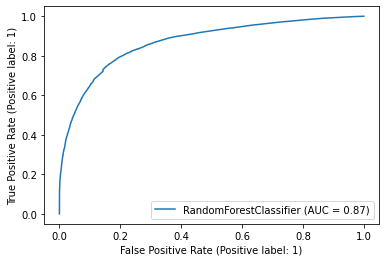

In [206]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, X_train_ns,y_train_ns)

## AUC-ROC Curve for Testing Data

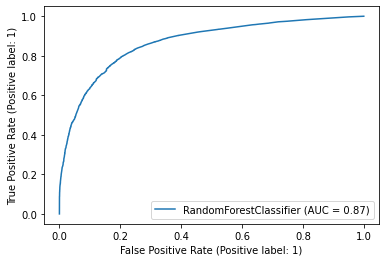

In [201]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, X_test, y_test)

# LogisticRegression Model

In [169]:
#import necessary library
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Finding the Best Random State

In [170]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train_ns,y_train_ns)
    
    y_pred=lr.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8615277293337984 RandomState 1


MAXINING TESTING SCORE 0.8615277293337984 ON RANDOM STATE OF 1
Testing Accuracy 0.8549877921171957 RandomState 2


Testing Accuracy 0.8566736425996977 RandomState 3


Testing Accuracy 0.8596674805255203 RandomState 4


Testing Accuracy 0.8560632484594815 RandomState 5


Testing Accuracy 0.8576618997790955 RandomState 6


Testing Accuracy 0.856615509824439 RandomState 7


Testing Accuracy 0.8595512149750029 RandomState 8


Testing Accuracy 0.8563829787234043 RandomState 9


Testing Accuracy 0.8554819207068945 RandomState 10


Testing Accuracy 0.8561504476223695 RandomState 11


Testing Accuracy 0.8578653644925008 RandomState 12


Testing Accuracy 0.8556853854202999 RandomState 13


Testing Accuracy 0.8576037670038368 RandomState 14


Testing Accuracy 0.8581850947564237 RandomState 15


Testing Accuracy 0.8592024183234508 RandomState 16


Testing Accuracy 0.8556853854202999 RandomState 17


Testing Accuracy 0.8569643064759912 RandomStat

In [171]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8615277293337984 On Random State 1


### Training the model

In [172]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=1)

In [173]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [174]:
# model initilization
clf_lr = LogisticRegression()
clf_lr.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [175]:
# call the function
metric_score (clf_lr,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_lr,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 85.471228%
====Testing Score====
Accuracy score : 86.152773%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.54      0.04      0.08      4797
           1       0.86      0.99      0.93     29607

    accuracy                           0.86     34404
   macro avg       0.70      0.52      0.50     34404
weighted avg       0.82      0.86      0.81     34404



## Model Scores¶
    Training Score = 85.471228%
    Testing Score = 86.152773%

# hyperparametres for logistic regression

In [176]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_scalar, y)

In [177]:
print (grid_result.best_params_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [178]:
# update our model and train again for new score 

clf_lr=LogisticRegression(C=0.01,penalty='none',solver='newton-cg')
clf_lr.fit(X_train_ns,y_train_ns)

LogisticRegression(C=0.01, penalty='none', solver='newton-cg')

In [179]:
# call the function
metric_score (clf_lr,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_lr,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 85.471228%
====Testing Score====
Accuracy score : 86.152773%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.54      0.04      0.08      4797
           1       0.86      0.99      0.93     29607

    accuracy                           0.86     34404
   macro avg       0.70      0.52      0.50     34404
weighted avg       0.82      0.86      0.81     34404



## Model Scores With Hyperparameter Tuning
    Training Score = 85.471228%
    Testing Score = 86.152773%

## Cross-Validation Score For logistic regression

In [180]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_lr,X_scalar,y,cv=6)

array([0.85559819, 0.85577258, 0.85742937, 0.85663833, 0.85707434,
       0.85628951])

In [181]:
cross_val_score(clf_lr,X_scalar,y,cv=6).mean()

0.8564670532654638

## Confusion Matrix for logistic regression

In [208]:
y_pred=clf_lr.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[  201,  4596],
       [  168, 29439]], dtype=int64)

# AUC-ROC Curve for Training Data

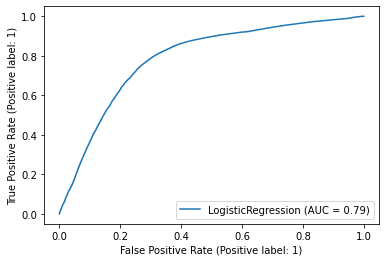

In [205]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf_lr, X_train_ns,y_train_ns)

# AUC-ROC Curve for Testing Data

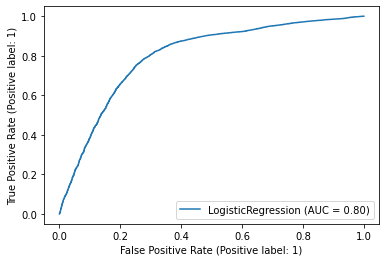

In [202]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf_lr, X_test, y_test)

# KNeighborsClassifier Model

In [183]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Finding the Best Random State

In [184]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,10):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8609754679688408 RandomState 1


MAXINING TESTING SCORE 0.8609754679688408 ON RANDOM STATE OF 1
Testing Accuracy 0.8556853854202999 RandomState 2


Testing Accuracy 0.857371235902802 RandomState 3


Testing Accuracy 0.8563829787234043 RandomState 4


Testing Accuracy 0.8537960702243925 RandomState 5


Testing Accuracy 0.856615509824439 RandomState 6


Testing Accuracy 0.8565573770491803 RandomState 7


Testing Accuracy 0.8572840367399139 RandomState 8


Testing Accuracy 0.8557144518079293 RandomState 9




In [185]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.8609754679688408 ON RANDOM STATE OF 1


### Training the model

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=1)

In [187]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [188]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)


KNeighborsClassifier()

In [189]:
# call the function
metric_score (clf_knn,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 88.906975%
====Testing Score====
Accuracy score : 86.097547%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.50      0.37      0.43      4797
           1       0.90      0.94      0.92     29607

    accuracy                           0.86     34404
   macro avg       0.70      0.65      0.67     34404
weighted avg       0.85      0.86      0.85     34404



## Model Scores
    Training Score = 88.906975%
    Testing Score = 86.097547%

## Hyperparameter For KNeighborsClassifier

In [190]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [191]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [192]:
#give the data to object
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [193]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [194]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 3)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [195]:
metric_score(clf_knn,X_train,X_test,y_train,y_test,train=True)

metric_score(clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 89.791588%
====Testing Score====
Accuracy score : 85.338914%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.47      0.37      0.42      4797
           1       0.90      0.93      0.92     29607

    accuracy                           0.85     34404
   macro avg       0.68      0.65      0.67     34404
weighted avg       0.84      0.85      0.85     34404



## Model Scores With Hyperparameter Tuning¶
    Training Score = 89.791588%
    Testing Score = 85.338914%

## Cross-Validation Score For KNN

In [196]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_knn,X_scalar,y,cv=6)

array([0.84448029, 0.84792466, 0.84700907, 0.84957489, 0.84739481,
       0.85044692])

In [197]:
cross_val_score(clf_knn,X_scalar,y,cv=6).mean()

0.847805105631701

## Confusion Matric for KNN

In [198]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[ 1792,  3005],
       [ 2039, 27568]], dtype=int64)

# AUC-ROC Curve for Training Data

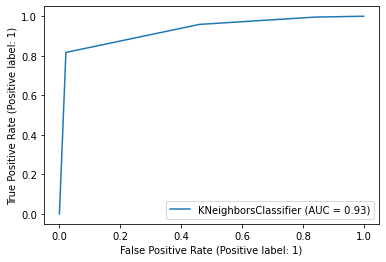

In [204]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf_knn, X_train_ns,y_train_ns)

# AUC-ROC Curve for Testing Data

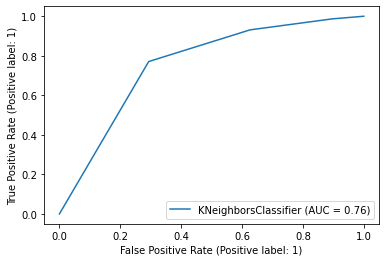

In [203]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf_knn, X_test, y_test)

# All Model Scores after Hyperparameter Tuning 

**DecisionTreeClassifier Model

    Training Score = 86.492457%
    Testing Score = 86.652715%
    Cross-Validation Score = 86.53252227783046%


**RandomForest Classifier Model

    Training Score = 86.963346%
    Testing Score = 87.469480%
    Cross-Validation Score = 86.92710793156387%


**LogisticRegression Model

    Training Score = 85.471228%
    Testing Score = 86.152773%
    Cross-Validation Score = 85.64670532654638%


**KNeighborsClassifier Model

    Training Score = 89.791588%
    Testing Score = 85.338914%
    Cross-Validation Score = 84.7805105631701%

# Saving the best Model

In [209]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(rf , open ('reg_model' , 'wb'))

## After tuning the hyperparameters, the Random Forest Classifier has been determined to be the best model for this problem, as it has a training score of 87% and a testing score of 87% according to the AUC-ROC curve.